In [1]:
#importing libraries 

import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as smf
import statsmodels.formula.api as sm
import warnings
warnings.filterwarnings('ignore')

# STEP 1

In [2]:
#importing data 

df = pd.read_csv('delivery_time.csv')
df

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


# STEP 2

In [3]:
#performing EDA 

#Renaming columns 
df1 = df.rename({'Delivery Time':'delivery_time','Sorting Time':'sorting_time'},axis=1)
df1

,delivery_time,sorting_time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [4]:
#checking datatype

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 468.0 bytes


In [5]:
df.describe

<bound method NDFrame.describe of     Delivery Time  Sorting Time
0           21.00            10
1           13.50             4
2           19.75             6
3           24.00             9
4           29.00            10
5           15.35             6
6           19.00             7
7            9.50             3
8           17.90            10
9           18.75             9
10          19.83             8
11          10.75             4
12          16.68             7
13          11.50             3
14          12.03             3
15          14.88             4
16          13.75             6
17          18.11             7
18           8.00             2
19          17.83             7
20          21.50             5>

In [6]:
#checking for null values 

df.isnull().sum()

Delivery Time    0
Sorting Time     0
dtype: int64

In [7]:
#checking for duplicate values

df[df.duplicated()].shape

(0, 2)

In [8]:
df[df.duplicated()]

,Delivery Time,Sorting Time


# STEP 3

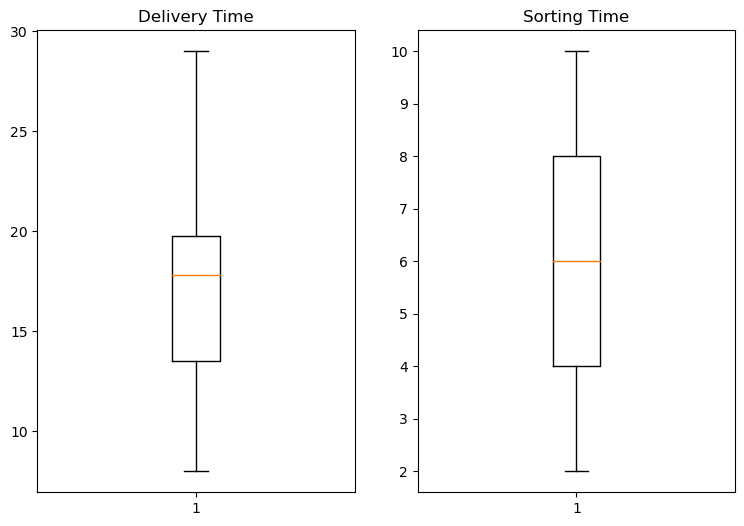

In [9]:
#Plotting the data to check for outliers

plt.subplots(figsize = (9,6))
plt.subplot(121)
plt.boxplot(df['Delivery Time'])
plt.title('Delivery Time')
plt.subplot(122)
plt.boxplot(df['Sorting Time'])
plt.title('Sorting Time')
plt.show()

# STEP 4

In [10]:
#Checking the Correlation between variables 

df.corr()

,Delivery Time,Sorting Time
Delivery Time,1.000000,0.825997
Sorting Time,0.825997,1.000000


<Axes: xlabel='Sorting Time', ylabel='Delivery Time'>

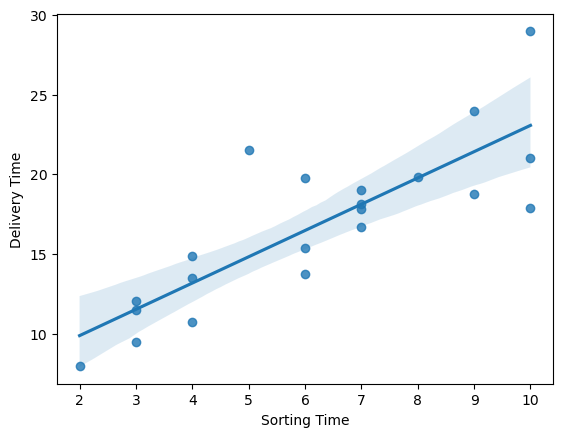

In [11]:
#Visualization of Correlation beteen x and y

sns.regplot(x=df['Sorting Time'],y=df['Delivery Time'])

# STEP 5

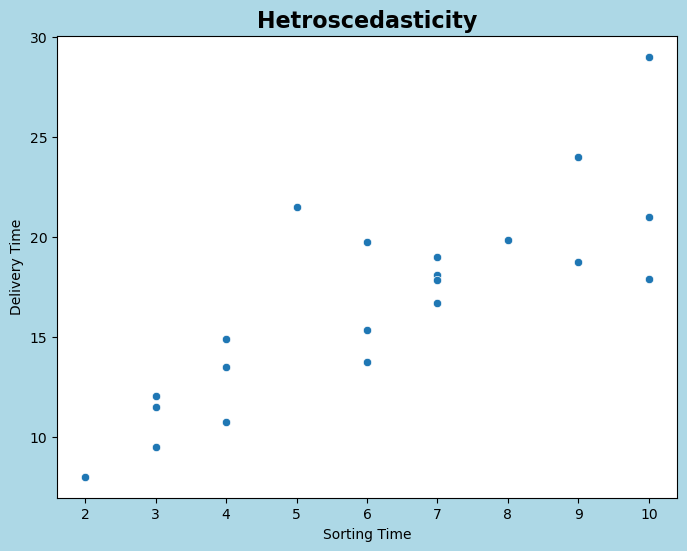

In [12]:
#Checking for Homoscedasticity or Hetroscedasticity

plt.figure(figsize = (8,6), facecolor = 'lightblue')
sns.scatterplot(x = df['Sorting Time'], y = df['Delivery Time'])
plt.title('Hetroscedasticity', fontweight = 'bold', fontsize = 16)
plt.show()

In [13]:
df.var()


Delivery Time    25.754619
Sorting Time      6.461905
dtype: float64

# STEP 6

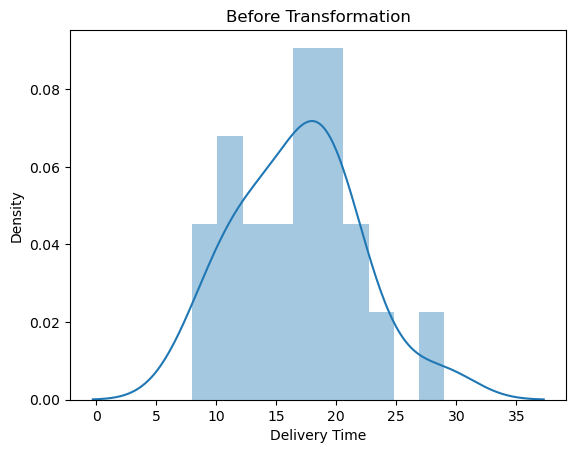

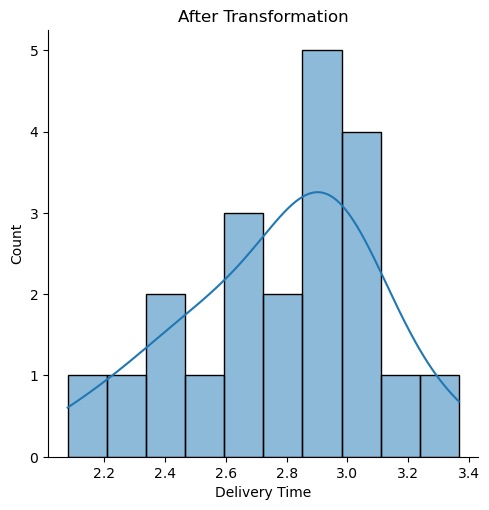

In [14]:
#Feature Engineering 

sns.distplot(df['Delivery Time'], bins = 10, kde = True)
plt.title('Before Transformation')
sns.displot(np.log(df['Delivery Time']), bins = 10, kde = True)
plt.title('After Transformation')
plt.show()

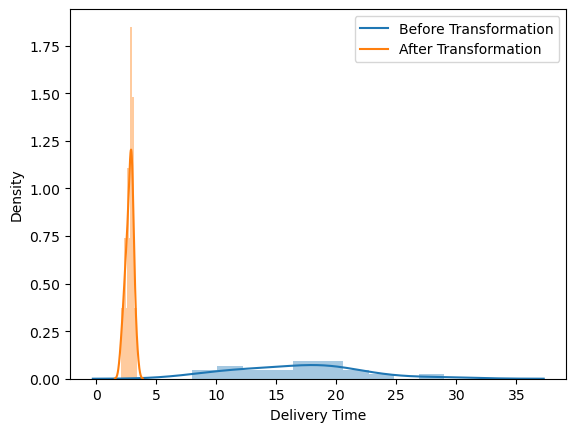

In [15]:
labels = ['Before Transformation','After Transformation']
sns.distplot(df['Delivery Time'], bins = 10, kde = True)
sns.distplot(np.log(df['Delivery Time']), bins = 10, kde = True)
plt.legend(labels)
plt.show()

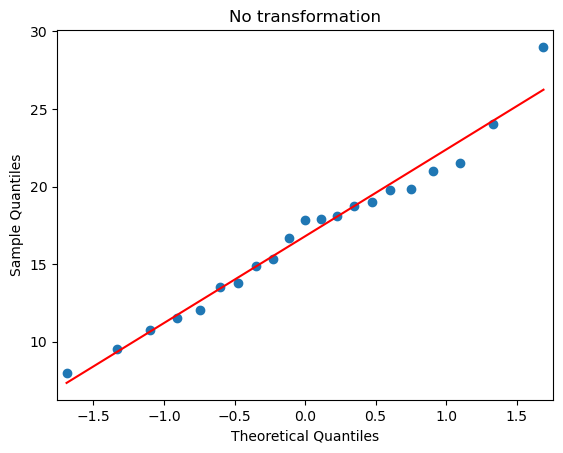

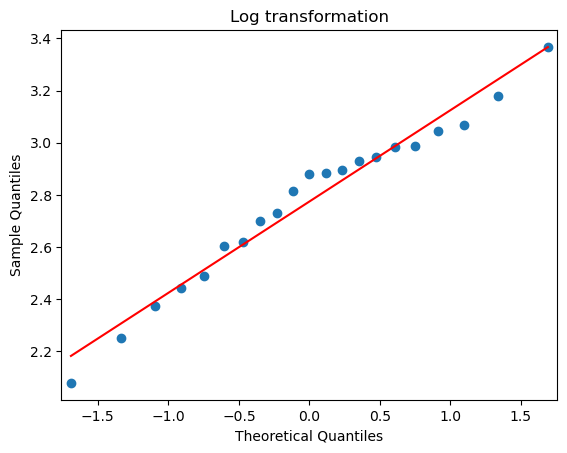

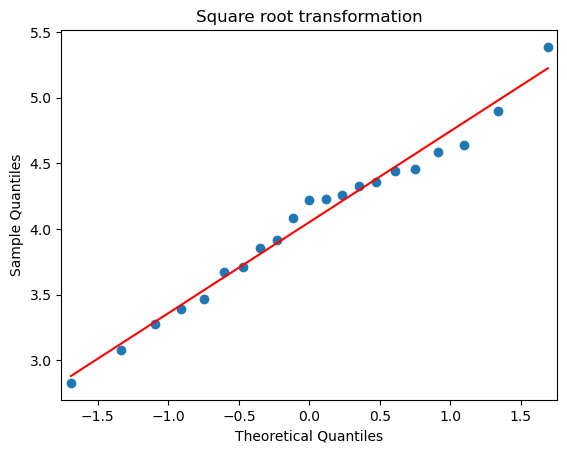

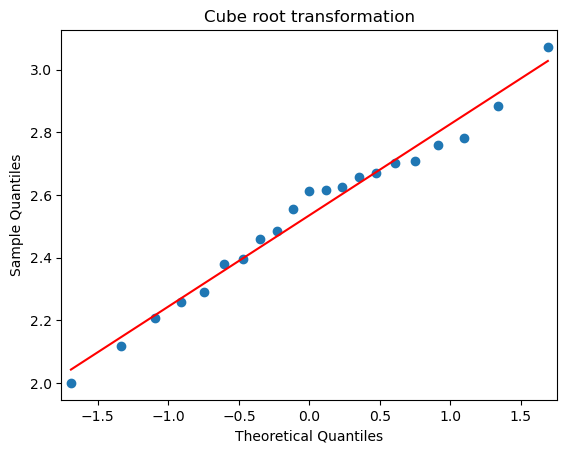

In [16]:
smf.qqplot(df['Delivery Time'], line = 'r')
plt.title('No transformation')
smf.qqplot(np.log(df['Delivery Time']), line = 'r')
plt.title('Log transformation')
smf.qqplot(np.sqrt(df['Delivery Time']), line = 'r')
plt.title('Square root transformation')
smf.qqplot(np.cbrt(df['Delivery Time']), line = 'r')
plt.title('Cube root transformation')
plt.show()

# STEP 7

In [19]:
#Fitting a Linear Regression Model

#1. Using Ordinary least squares (OLS) regression

model = sm.ols('delivery_time~sorting_time', data = df1).fit()
model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          delivery_time   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Mon, 08 Jan 2024   Prob (F-statistic):           3.98e-06
Time:                        09:27:37   Log-Likelihood:                -51.357
No. Observations:                  21   AIC:                             106.7
Df Residuals:                      19   BIC:                             108.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        6.5827      1.722      3.823      0.001       2.979      10.186
sorting_time     1.6490      0.258      6.387      0.000       1.109       2.189
==============================================================================
Omnibus:                        3.649   Durbin-Watson:                   1.248
Prob(Omnibus):                  0.161   Jarque-Bera (JB):                2.086
Skew:                           0.750   Prob(JB):                        0.352
Kurtosis:                       3.367   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [20]:
#Square Root transformation on data

model3 = sm.ols('np.log(delivery_time)~np.log(sorting_time)', data = df1).fit()
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     np.log(delivery_time)   R-squared:                       0.772
Model:                               OLS   Adj. R-squared:                  0.760
Method:                    Least Squares   F-statistic:                     64.39
Date:                   Mon, 08 Jan 2024   Prob (F-statistic):           1.60e-07
Time:                           09:27:51   Log-Likelihood:                 10.291
No. Observations:                     21   AIC:                            -16.58
Df Residuals:                         19   BIC:                            -14.49
Df Model:                              1                                         
Covariance Type:               nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                1.7420      0.133     13.086      0.000       1.463       2.021
np.log(sorting_time)     0.5975      0.074      8.024      0.000       0.442       0.753
==============================================================================
Omnibus:                        1.871   Durbin-Watson:                   1.322
Prob(Omnibus):                  0.392   Jarque-Bera (JB):                1.170
Skew:                           0.577   Prob(JB):                        0.557
Kurtosis:                       2.916   Cond. No.                         9.08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [22]:
#Cube Root transformation on Data

model2 = sm.ols('np.cbrt(delivery_time)~np.cbrt(sorting_time)', data = df1).fit()
model2.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                              
==================================================================================
Dep. Variable:     np.cbrt(delivery_time)   R-squared:                       0.744
Model:                                OLS   Adj. R-squared:                  0.731
Method:                     Least Squares   F-statistic:                     55.25
Date:                    Mon, 08 Jan 2024   Prob (F-statistic):           4.90e-07
Time:                            09:36:57   Log-Likelihood:                 13.035
No. Observations:                      21   AIC:                            -22.07
Df Residuals:                          19   BIC:                            -19.98
Df Model:                               1                                         
Covariance Type:                nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 1.0136      0.207      4.900      0.000       0.581       1.447
np.cbrt(sorting_time)     0.8456      0.114      7.433      0.000       0.607       1.084
==============================================================================
Omnibus:                        2.570   Durbin-Watson:                   1.292
Prob(Omnibus):                  0.277   Jarque-Bera (JB):                1.532
Skew:                           0.661   Prob(JB):                        0.465
Kurtosis:                       3.075   Cond. No.                         16.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [24]:
#Log transformation on Data

model3 = sm.ols('np.log(delivery_time)~np.log(sorting_time)', data = df1).fit()
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     np.log(delivery_time)   R-squared:                       0.772
Model:                               OLS   Adj. R-squared:                  0.760
Method:                    Least Squares   F-statistic:                     64.39
Date:                   Mon, 08 Jan 2024   Prob (F-statistic):           1.60e-07
Time:                           09:39:57   Log-Likelihood:                 10.291
No. Observations:                     21   AIC:                            -16.58
Df Residuals:                         19   BIC:                            -14.49
Df Model:                              1                                         
Covariance Type:               nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                1.7420      0.133     13.086      0.000       1.463       2.021
np.log(sorting_time)     0.5975      0.074      8.024      0.000       0.442       0.753
==============================================================================
Omnibus:                        1.871   Durbin-Watson:                   1.322
Prob(Omnibus):                  0.392   Jarque-Bera (JB):                1.170
Skew:                           0.577   Prob(JB):                        0.557
Kurtosis:                       2.916   Cond. No.                         9.08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [25]:
#Model Testing
#As Y = Beta0 + Beta1*(X)
#Finding Coefficient Parameters (Beta0 and Beta1 values)

model.params

Intercept       6.582734
sorting_time    1.649020
dtype: float64

In [26]:
print(model.tvalues,'\n',model.pvalues)

Intercept       3.823349
sorting_time    6.387447
dtype: float64 
 Intercept       0.001147
sorting_time    0.000004
dtype: float64


In [27]:
model.rsquared,model.rsquared_adj

(0.6822714748417231, 0.6655489208860244)

# STEP 8

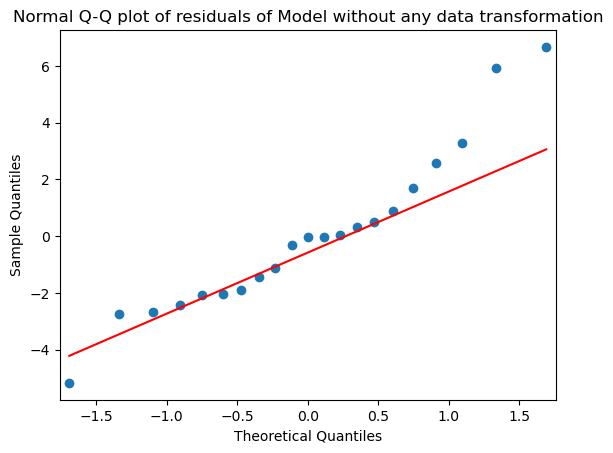

In [28]:
#Residual Analysis
#Test for Normality of Residuals (Q-Q Plot)

import statsmodels.api as sm
sm.qqplot(model.resid, line = 'q')
plt.title('Normal Q-Q plot of residuals of Model without any data transformation')
plt.show()

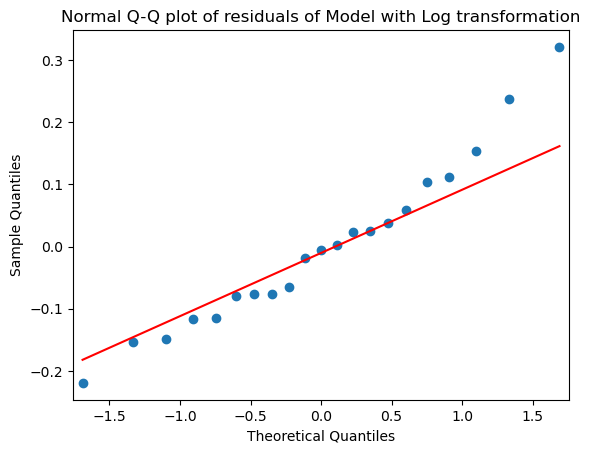

In [29]:
sm.qqplot(model2.resid, line = 'q')
plt.title('Normal Q-Q plot of residuals of Model with Log transformation')
plt.show()

# STEP 9

In [40]:
#Model Validation

from sklearn.metrics import mean_squared_error


model2_pred_y =pow(model2.predict(df1['sorting_time']),3)

model3_pred_y =np.exp(model3.predict(df1['sorting_time']))

model2_rmse =np.sqrt(mean_squared_error(df1['delivery_time'], model2_pred_y))
model3_rmse =np.sqrt(mean_squared_error(df1['delivery_time'], model3_pred_y))
print('model=', np.sqrt(model.mse_resid),'\n' 'model2=', model2_rmse,'\n' 'model3=', model3_rmse)


model= 2.934903768890139 
model2= 2.7555843098935733 
model3= 2.745828897614548


In [41]:
data = {'model': np.sqrt(model.mse_resid), 'model2': model3_rmse, 'model3' : model3_rmse}
min(data, key=data.get)

'model2'

# STEP 10

In [43]:
#Predicting values from Model with Log Transformation on the Data

predicted = pd.DataFrame()
predicted['sorting_time'] = df1.sorting_time
predicted['delivery_time'] = df1.delivery_time
predicted['Predicted_Delivery_Time'] = pd.DataFrame(np.exp(model2.predict(predicted.sorting_time)))
predicted

,sorting_time,delivery_time,Predicted_Delivery_Time
0,10,21.00,17.035997
1,4,13.50,10.547128
2,6,19.75,12.808396
3,9,24.00,15.997918
4,10,29.00,17.035997
5,6,15.35,12.808396
6,7,19.00,13.889274
7,3,9.50,9.328887
8,10,17.90,17.035997
9,9,18.75,15.997918


In [45]:
#Predicitng from Original Model without any data transformation 

predicted1 = pd.DataFrame()
predicted1['sorting_time'] = df1.sorting_time
predicted1['delivery_time'] = df1.delivery_time
predicted1['Predicted_Delivery_Time'] = pd.DataFrame(model.predict(predicted1.sorting_time))
predicted1

,sorting_time,delivery_time,Predicted_Delivery_Time
0,10,21.00,23.072933
1,4,13.50,13.178814
2,6,19.75,16.476853
3,9,24.00,21.423913
4,10,29.00,23.072933
5,6,15.35,16.476853
6,7,19.00,18.125873
7,3,9.50,11.529794
8,10,17.90,23.072933
9,9,18.75,21.423913
